Evaluating SVD...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9410  0.9390  0.9322  0.9362  0.9434  0.9384  0.0039  
Fit time          0.46    0.37    0.42    0.45    0.38    0.41    0.04    
Test time         0.07    0.11    0.06    0.06    0.11    0.08    0.02    
Evaluating KNNBasic...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9767  0.9756  0.9775  0.9791  0.9841  0.9786  0.0030  
Fit time          0.17    0.16    0.16   

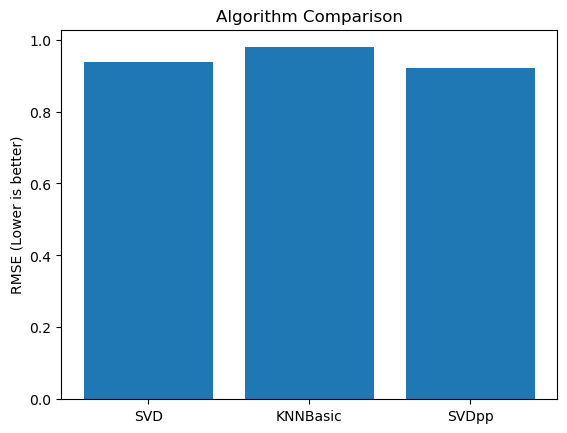

In [10]:
import matplotlib.pyplot as plt
from surprise import Dataset, SVD, KNNBasic, SVDpp
from surprise.model_selection import cross_validate
from surprise import accuracy

# 使用MovieLens数据集，加载数据集
data = Dataset.load_builtin('ml-100k')

# 初始化不同的推荐算法
algorithms = {
    'SVD': SVD(),
    'KNNBasic': KNNBasic()
}

# 用于存储不同算法的性能指标
results = {}

# 交叉验证并评估每个算法
for algo_name, algo in algorithms.items():
    print(f"Evaluating {algo_name}...")
    results[algo_name] = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

# 可视化比较不同算法的性能
rmse_results = {algo_name: results[algo_name]['test_rmse'].mean() for algo_name in algorithms}
plt.bar(rmse_results.keys(), rmse_results.values())
plt.ylabel('RMSE (Lower is better)')
plt.title('Algorithm Comparison')
plt.show()


In [1]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# 使用内置数据集 MovieLens 100k
data = Dataset.load_builtin('ml-100k')

# 将数据集划分为训练集和测试集
trainset, testset = train_test_split(data, test_size=0.01)

# 使用基于用户的协同过滤算法构建推荐模型
sim_options = {
    'name': 'cosine',
    'user_based': True
}
model = KNNBasic(sim_options=sim_options)

# 在训练集上拟合模型
model.fit(data)

# 在测试集上进行预测
predictions = model.test(testset)

# 计算预测的均方根误差（RMSE）
rmse = accuracy.rmse(predictions)

# 进行推荐
user_id = 13  # 替换为您想要为之生成推荐的用户ID
top_n = 10  # 想要生成的推荐数量

# 获取用户已评分的电影
rated_movies = [rating[0] for rating in trainset.ur[int(user_id)]]

# 获取所有电影的ID
movie_ids = range(1683)

# 获取用户未评分的电影
unrated_movies = [movie_id for movie_id in movie_ids if movie_id not in rated_movies]

# 预测用户对未评分电影的评分
user_ratings = [(int(user_id), movie_id, model.predict(int(user_id), int(movie_id)).est) for movie_id in unrated_movies]

# 按评分排序，生成前N个推荐
user_ratings.sort(key=lambda x: x[2], reverse=True)
top_ratings = user_ratings[:top_n]

# 打印出推荐结果
print(f"为用户 {user_id} 推荐的前 {top_n} 部电影:")
for rating in top_ratings:
    movie_id = rating[1]
    predicted_rating = rating[2]
    print(f"电影 ID: {movie_id}, 预测评分: {predicted_rating}")


AttributeError: 'DatasetAutoFolds' object has no attribute 'n_users'

In [2]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

# 示例数据
data = [
    ('Alice', 'Star Wars', 5),
    ('Alice', 'Inception', 4),
    ('Alice', 'The Shawshank Redemption', 3),
    ('Bob', 'Star Wars', 4),
    ('Bob', 'Inception', 5),
    ('Bob', 'The Shawshank Redemption', 4),
    ('Carol', 'Star Wars', 3),
    ('Carol', 'Inception', 2),
    ('Carol', 'The Shawshank Redemption', 4),
    ('Dave', 'Star Wars', 5),
    ('Dave', 'Inception', 5),
    ('Dave', 'The Shawshank Redemption', 5)
]

# 创建DataFrame
df = pd.DataFrame(data, columns=['user_id', 'item_id', 'rating'])

# 创建一个Reader对象，定义评分范围
reader = Reader(rating_scale=(1, 5))

# 加载数据集
dataset = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

# 使用KNNBasic算法构建模型
sim_options = {
    'name': 'cosine',
    'user_based': False  # 基于物品的协同过滤
}

model = KNNBasic(sim_options=sim_options)

# 交叉验证评估模型
cross_validate(model, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# 训练模型
trainset = dataset.build_full_trainset()
model.fit(trainset)

# 进行推荐
user_id = 'Alice'
item_id = 'Inception'

# 获取给定用户对于指定电影的评分预测
predicted_rating = model.predict(user_id, item_id).est
print(f'预测评分为: {predicted_rating}')


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9113  0.2986  1.2772  1.0649  1.0670  0.9238  0.3336  
MAE (testset)     0.6638  0.1839  1.2521  0.7530  0.7545  0.7214  0.3394  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Computing the cosine similarity matrix...
Done computing similarity matrix.
预测评分为: 4.00803661742721


In [4]:
from surprise import Dataset, SVD
from surprise.model_selection import cross_validate

# 使用内置数据集MovieLens 100K
data = Dataset.load_builtin('ml-100k')

# 加载数据集
trainset = data.build_full_trainset()

model = SVD()

# 交叉验证评估模型
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=4, verbose=True)

# 训练模型
model.fit(trainset)

# 进行推荐
user_id = str(196)  # 示例用户ID
item_id = str(302)  # 示例电影ID

# 获取给定用户对于指定电影的评分预测
predicted_rating = model.predict(user_id, item_id).est
print(f'预测评分为: {predicted_rating}')


Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9410  0.9506  0.9374  0.9389  0.9420  0.0051  
MAE (testset)     0.7419  0.7511  0.7390  0.7394  0.7429  0.0049  
Fit time          0.48    0.38    0.35    0.44    0.42    0.05    
Test time         0.13    0.08    0.07    0.12    0.10    0.03    
预测评分为: 4.035838307420791
